In [1]:
import ROOT

Welcome to JupyROOT 6.24/06


In [2]:
f_MC = ROOT.TFile.Open("ttbar_8TeV.root")
f_Data = ROOT.TFile.Open("Data_8TeV.root") 

In [3]:
canvas = ROOT.TCanvas("Canvas","a first way to plot a variable",800,600)

In [4]:
tree_MC = f_MC.Get("mini")

In [5]:
tree_MC.Print()
tree_MC.GetEntries()

1500000

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries :  1500000 : Total =       567791759 bytes  File  Size =  300057248 *
*        :          : Tree compression factor =   1.89                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :  1500000 : Total  Size=    6002049 bytes  File Size  =      31136 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression= 192.75     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :  1500000 : Total  Size=    6002093 bytes  File Size  =    3819950 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression=   1.57     *
*...................................................

In [6]:
tree_Data = f_Data.Get("mini")

In [7]:
tree_Data.Print()
tree_Data.GetEntries()

14945674

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries : 14945674 : Total =      3737586466 bytes  File  Size = 1366006484 *
*        :          : Tree compression factor =   2.74                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries : 14945674 : Total  Size=   59789737 bytes  File Size  =     297928 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression= 200.68     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries : 14945674 : Total  Size=   59789885 bytes  File Size  =   44412272 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression=   1.35     *
*...................................................

In [8]:
cutflow_DwCts = ROOT.TH1F("Cutflow_DwCts","Cutflow; Cut; Events",10,0,10)
hist_njets_DwCts = ROOT.TH1F("Number of jets_DwCts","n-jets; Jet multiplicity; Events",10,3.5,8.5)
#############
hist_lep_n_DwCts = ROOT.TH1F("Lepton_n_DtwCts","Number of Leptons distribution; N ; Events ",500,0,250)
hist_lep_pt_DwCts = ROOT.TH1F("Lepton_pT_DtwCts","Lepton pT distribution; pT (MeV) ; Events ",100,20000,70000)
hist_lep_eta_DwCts = ROOT.TH1F("Lepton_eta_DtwCts","Lepton \eta distribution; \eta (Grad) ; Events ",28,-3,3)
#############
hist_lep_TrckIslton_DwCts = ROOT.TH1F("Lepton_TrckIslton_DtwCts","Lepton Track Isolation distribution; lep_ptcone30/lep_pt ; Events ",50,-0.25,0.5)
hist_lep_ClrmtrIslton_DwCts = ROOT.TH1F("Lepton_ClrmtrIslton_DtwCts","Lepton Calorimeter Isolation distribution; lep_etcone20/lep_pt ; Events ",50,-0.2,0.8)
############
############
hist_n_jet_DwCts = ROOT.TH1F("n_jet_DwCts","Number of Jets distribution; N ; Events ",50,4,15)
hist_jet_pt_DwCts = ROOT.TH1F("jet_pT_DwCts","Jet pT distribution; pT (MeV) ; Events ",100,10000,150000)
hist_jet_eta_DwCts = ROOT.TH1F("jet_etawCts","Jet {\eta}  distribution; \eta ; Events ",12,-3,3)
hist_jet_jvf_DwCts = ROOT.TH1F("jet_jvf_DwCts","Jet JVF distribution; JVF ; Events ",50,-0.1,1.1)
hist_jet_MV1_DwCts = ROOT.TH1F("jet_MV1_DwCts","Jet MV1 distribution; MV1 ; Events ",50,0,1)
hist_n_bjets_DwCts = ROOT.TH1F("n_bjets_DwCts","Number of b-jets distribution; N ; Events ",50,0,6)
hist_2_bjets_DwCts = ROOT.TH1F("2_bjets_DwCts","Two b-Jets distribution; N ; Events ",50,0.5,4.5)
hist_MET_DwCts = ROOT.TH1F("MET_DwCts","MET distribution; MET (MeV) ; Events ",100,20000,250000)
hist_mT_W_DwCts = ROOT.TH1F("mT_W_DwCts","Transverse mass-W Boson distribution; mT_W (MeV) ; Events ",100,20000,150000)

In [9]:
cut1 = 0
cut2 = 0
cut3 = 0
cut4 = 0
cut5 = 0
cut6 = 0
cut7 = 0
cut8 = 0


for event in tree_Data:
    #First cut: Good Vertex
    if (tree_Data.hasGoodVertex):
        cut1 +=1
        cutflow_DwCts.Fill(1)
        #Second cut: Trigger
        if (tree_Data.trigE or tree_Data.trigM):
            cut2 +=1
            cutflow_DwCts.Fill(2)
            #Preselection of good leptons
            n_mu = 0
            n_el = 0
            n_lep = 0
            #Loop over leptons
            for tr in range(tree_Data.lep_n):
                if tree_Data.lep_pt[tr]>25000.:
                    if (tree_Data.lep_ptcone30[tr]/tree_Data.lep_pt[tr])<0.15:
                        if (tree_Data.lep_etcone20[tr]/tree_Data.lep_pt[tr])<0.15:
                            if (tree_Data.lep_type[tr]==13 and ROOT.fabs(tree_Data.lep_eta[tr])<2.5):
                                n_mu +=1
                                n_lep += 1
                            elif (tree_Data.lep_type[tr]==11 and (ROOT.fabs(tree_Data.lep_eta[tr])<1.37)):
                                n_el +=1
                                n_lep += 1
                            elif (tree_Data.lep_type[tr]==11 and ((ROOT.fabs(tree_Data.lep_eta[tr])>1.52) and (ROOT.fabs(tree_Data.lep_eta[tr])<2.47))):
                                n_el +=1
                                n_lep += 1
                                #n_lep = n_mu + n_el
                            if (n_lep==1):
                                goodLptnIndx = tr
                                #Lepton.SetPtEtaPhiM(tree.lep_pt[tr],tree.lep_eta[tr],tree.lep_phi[tr],tree.lep_E[tr])
            #Select events with only 1 good lepton and fill the cutflow hidtogram
            #Third cut (one good lepton):
            if(n_lep==1):
                cutflow_DwCts.Fill(3)
                cut3 +=1
                n_jets = 0
                n_bjets = 0
                #Number of jets distribution
                hist_njets_DwCts.Fill(tree_Data.jet_n)
                #Fourth cut: At least 4 jets
                if(tree_Data.jet_n >= 4):
                    cutflow_DwCts.Fill(4)
                    cut4 +=1
                    for tr in range(tree_Data.jet_n):
                        if (tree_Data.jet_pt[tr] > 25000.) and (ROOT.fabs(tree_Data.jet_eta[tr]) < 2.5):
                            n_jets +=1
                        if (tree_Data.jet_pt[tr]<50000) and (ROOT.fabs(tree_Data.jet_eta[tr])<2.4):
                            if(tree_Data.jet_jvf[tr]>0.5):
                                n_jets +=1
                        if((tree_Data.jet_MV1[tr]) >= 0.7892):
                            n_bjets +=1
                #Fifth cut: At least 4 good jets
                if (n_jets > 4):
                    cutflow_DwCts.Fill(5)
                    cut5 +=1
                    #Sixth cut: at least one b-jet
                    if (n_bjets >= 2):
                        cutflow_DwCts.Fill(6)
                        cut6 +=1
                            
                        Lepton = ROOT.TLorentzVector()
                        MeT = ROOT.TLorentzVector()
                        Lepton.SetPtEtaPhiM(tree_Data.lep_pt[goodLptnIndx],tree_Data.lep_eta[goodLptnIndx],tree_Data.lep_phi[goodLptnIndx],tree_Data.lep_E[goodLptnIndx])
                        MeT.SetPtEtaPhiM(tree_Data.met_et,0.0,tree_Data.met_phi,tree_Data.met_et)
                        mTW_D = ROOT.sqrt(2*Lepton.Pt()*MeT.Et()*(1-ROOT.cos(Lepton.DeltaPhi(MeT))))
                        #Seventh cut: MET > 30 GeV
                        if (tree_Data.met_et > 30000.):
                            cutflow_DwCts.Fill(7)
                            cut7 +=1
                            #Eighth cut: Calculation of the mTW using TLorentz vectors
                            if (mTW_D > 30000.):
                                cutflow_DwCts.Fill(8)
                                cut8 +=1
                                #Filling pT Histogram
                                for tr in range(tree_Data.lep_n):
                                    hist_lep_pt_DwCts.Fill(tree_Data.lep_pt[tr])
                                #Filling Track isolation Histogram
                                #for event in tree_Data:
                                for tr in range(tree_Data.lep_n):
                                    hist_lep_TrckIslton_DwCts.Fill(tree_Data.lep_ptcone30[tr]/tree_Data.lep_pt[tr])
                                #Filling Calorimeter solation Histogram
                                #for event in tree_Data:
                                for tr in range(tree_Data.lep_n):
                                    hist_lep_ClrmtrIslton_DwCts.Fill(tree_Data.lep_etcone20[tr]/tree_Data.lep_pt[tr])
                                #Filling eta Histogram
                                #for event in tree_Data:
                                for tr in range(tree_Data.lep_n):
                                    hist_lep_eta_DwCts.Fill(tree_Data.lep_eta[tr])
                                #Filling Number of Jets Histogram
                                #for event in tree_Data:
                                hist_n_jet_DwCts.Fill(n_jets)
                                hist_2_jet_DwCts = hist_n_jet_DwCts
                                #Filling jet_pT Histogram
                                #for event in tree_Data:
                                for tr in range(tree_Data.jet_n):
                                    hist_jet_pt_DwCts.Fill(tree_Data.jet_pt[tr])
                                #Filling jet_eta Histogram
                                #for event in tree_Data:
                                for tr in range(tree_Data.jet_n):
                                    hist_jet_eta_DwCts.Fill(tree_Data.jet_eta[tr])
                                #Filling jet_JVF Histogram
                                #for event in tree_Data:
                                for tr in range(tree_Data.jet_n):
                                    hist_jet_jvf_DwCts.Fill(tree_Data.jet_jvf[tr])
                                #Filling jet_MV1 Histogram
                                #for event in tree_Data:
                                for tr in range(tree_Data.jet_n):
                                    hist_jet_MV1_DwCts.Fill(tree_Data.jet_MV1[tr])
                                #Filling Number of b-Jets Histogram
                                #for event in tree_Data:
                                hist_n_bjets_DwCts.Fill(n_bjets)
                                hist_2_bjets_DwCts.Fill(n_bjets)
                                #Filling MET Histogram
                                #for event in tree_Data:
                                hist_MET_DwCts.Fill(tree_Data.met_et)
                                #Filling mT_W Histogram
                                #for event in tree_Data:
                                hist_mT_W_DwCts.Fill(mTW_D)
                                #hist_mT_W_DwCts.Fill(tree_Data.mTW_D)



            

print(cut1)
print(cut2)
print(cut3)
print(cut4)
print(cut5)
print(cut6)
print(cut7)
print(cut8)

14656440
14656440
11533697
61833
58699
10103
7994
6940


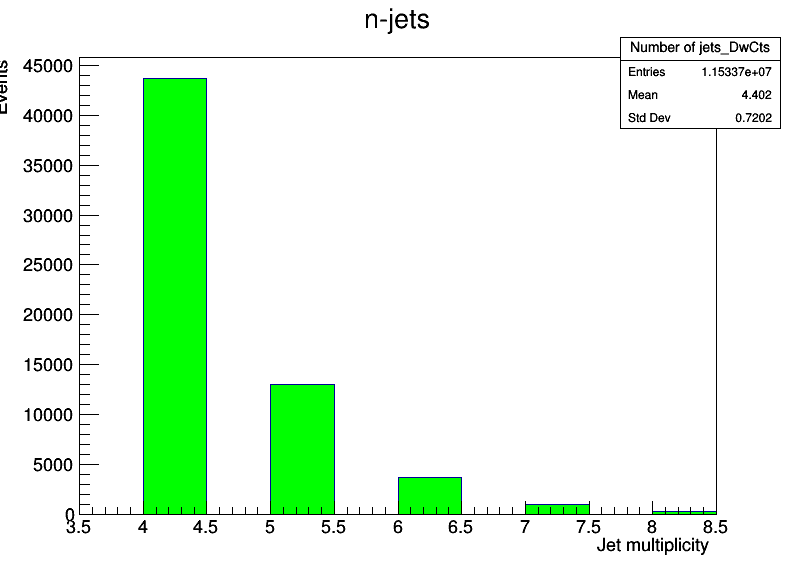

In [10]:
hist_njets_DwCts.SetFillColor(3)
hist_njets_DwCts.Draw()
canvas.Draw()

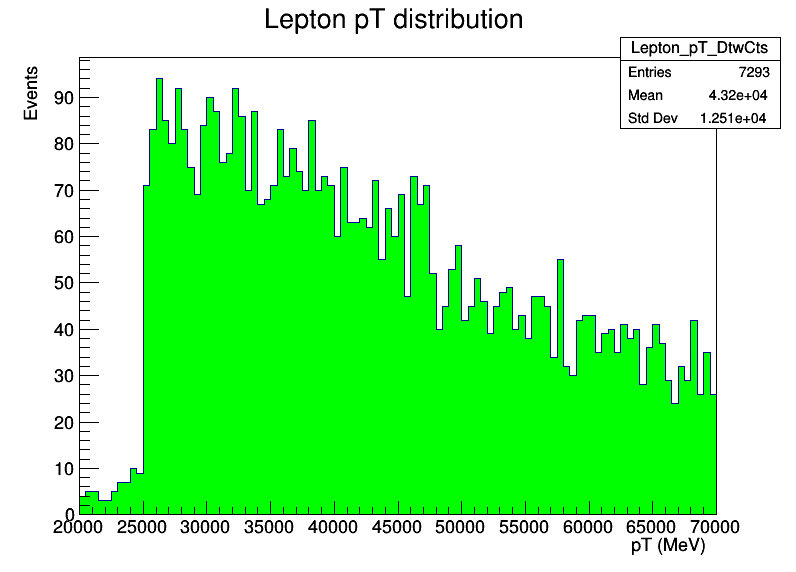

In [11]:
hist_lep_pt_DwCts.SetFillColor(3)
hist_lep_pt_DwCts.Draw()
canvas.Draw()

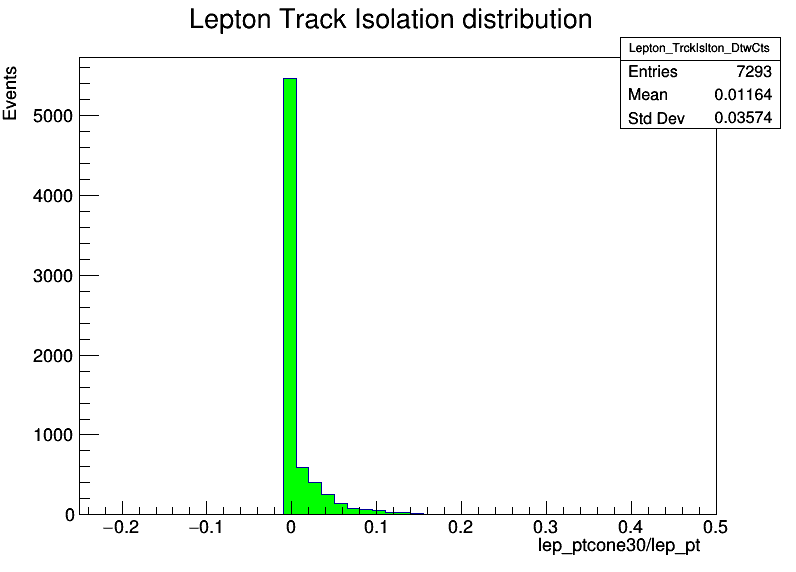

In [12]:
hist_lep_TrckIslton_DwCts.SetFillColor(3)
hist_lep_TrckIslton_DwCts.Draw()
canvas.Draw()

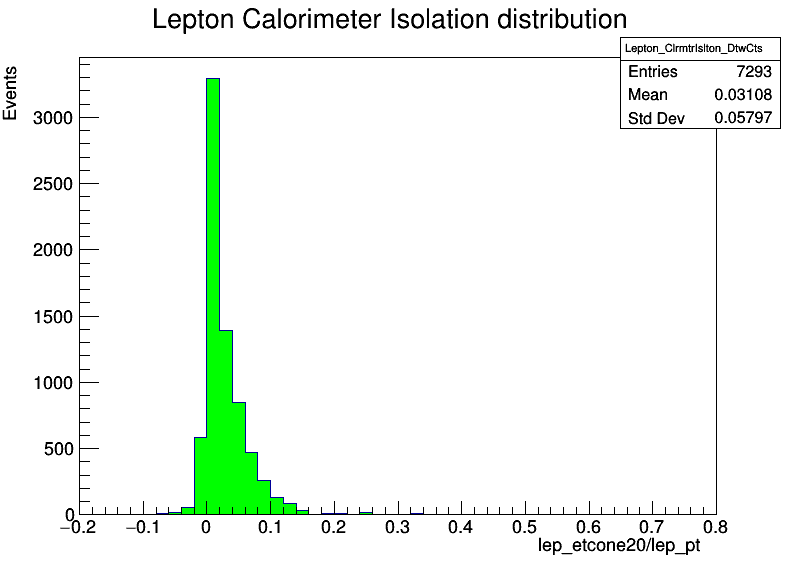

In [13]:
hist_lep_ClrmtrIslton_DwCts.SetFillColor(3)
hist_lep_ClrmtrIslton_DwCts.Draw()
canvas.Draw()

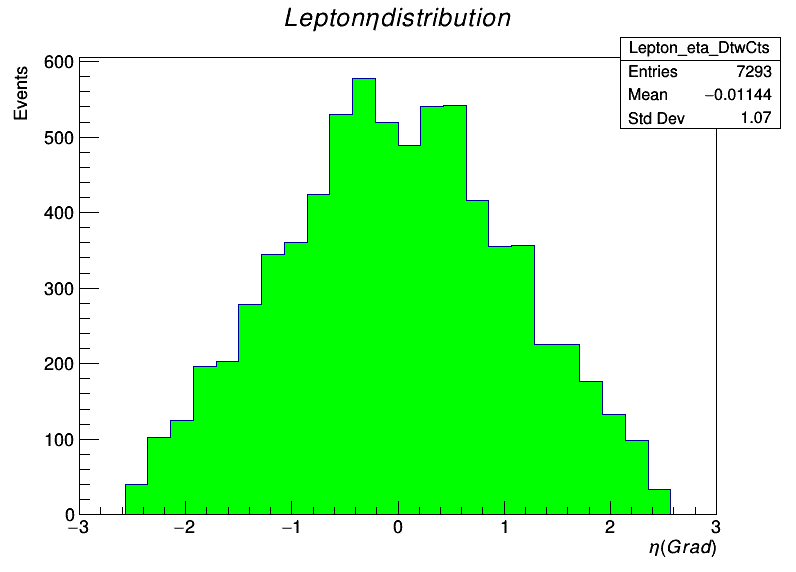

In [14]:
hist_lep_eta_DwCts.SetFillColor(3)
hist_lep_eta_DwCts.Draw()
canvas.Draw()

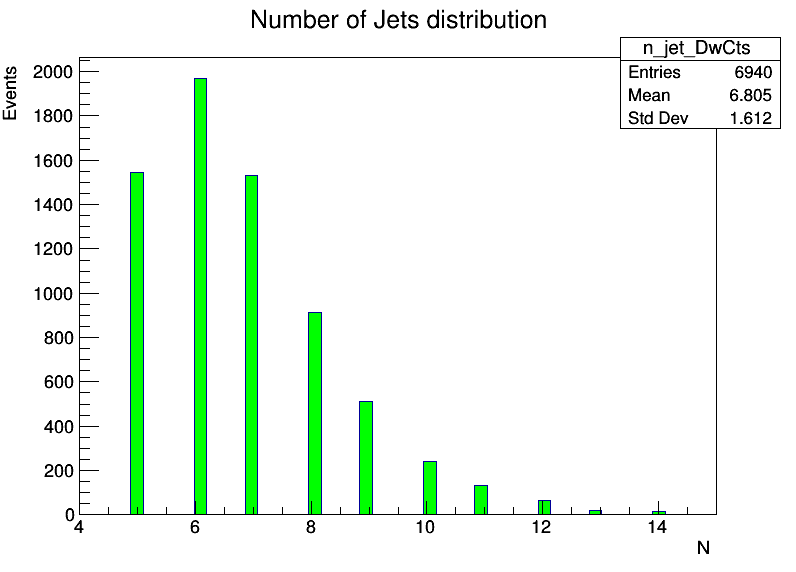

In [15]:
hist_n_jet_DwCts.SetFillColor(3)
hist_n_jet_DwCts.Draw()
canvas.Draw()

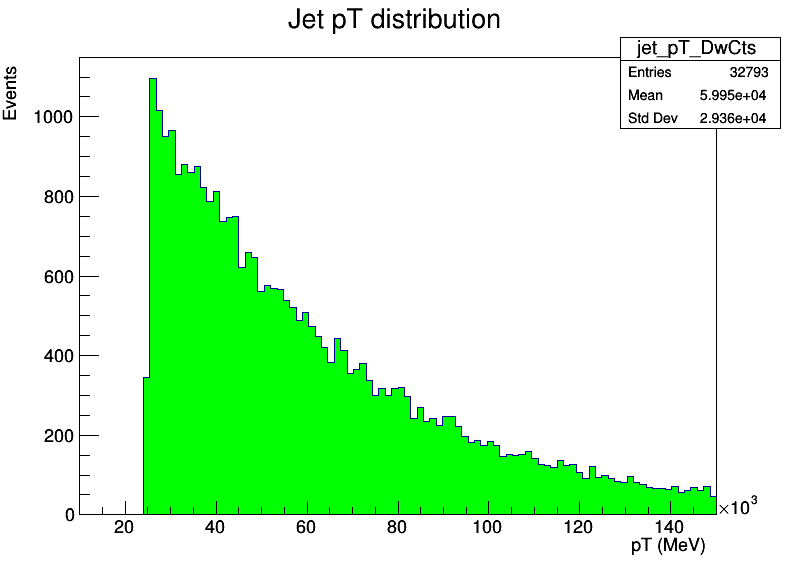

In [16]:
hist_jet_pt_DwCts.SetFillColor(3)
hist_jet_pt_DwCts.Draw()
canvas.Draw()

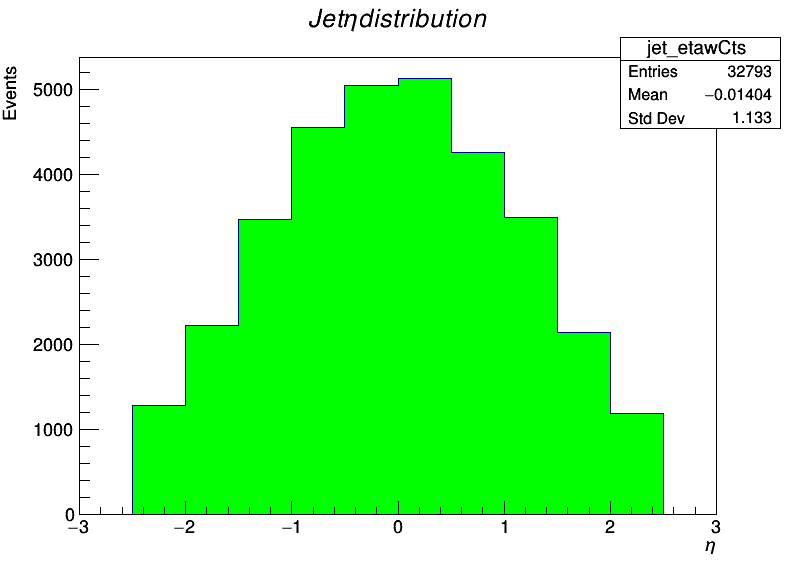

In [17]:
hist_jet_eta_DwCts.SetFillColor(3)
hist_jet_eta_DwCts.Draw()
canvas.Draw()

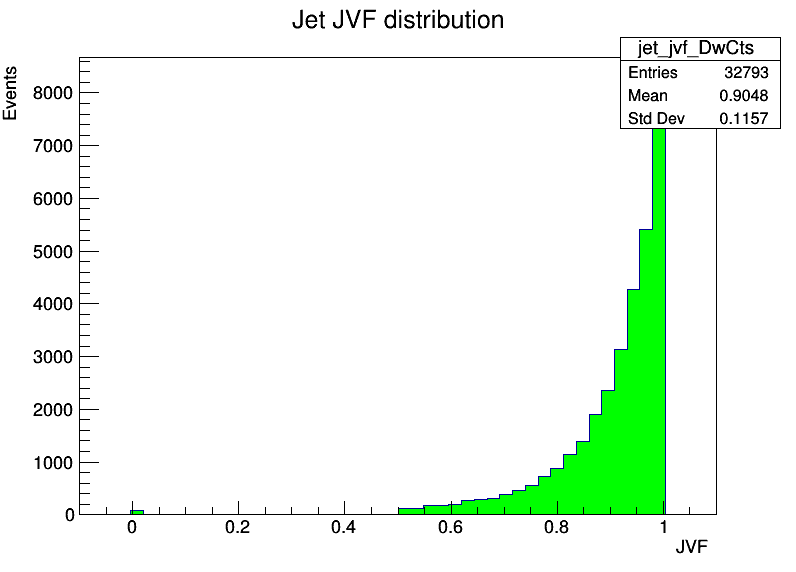

In [18]:
hist_jet_jvf_DwCts.SetFillColor(3)
hist_jet_jvf_DwCts.Draw()
canvas.Draw()

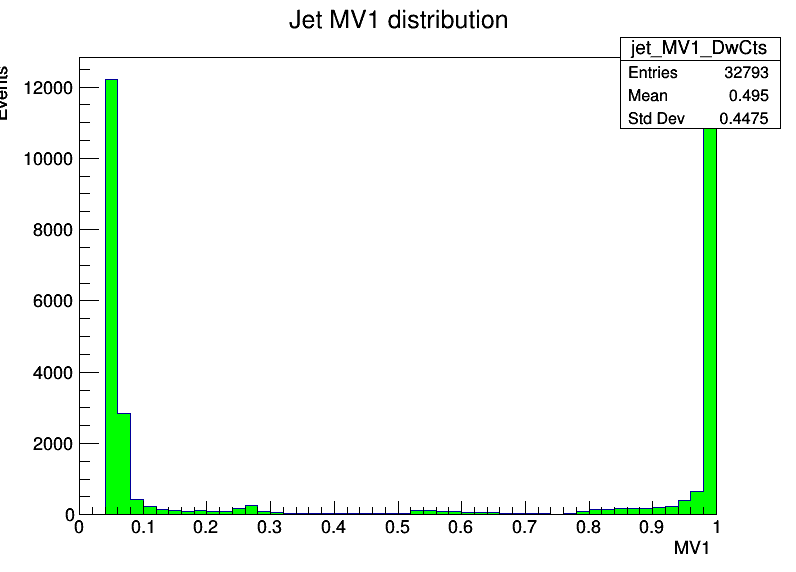

In [19]:
hist_jet_MV1_DwCts.SetFillColor(3)
hist_jet_MV1_DwCts.Draw()
canvas.Draw()

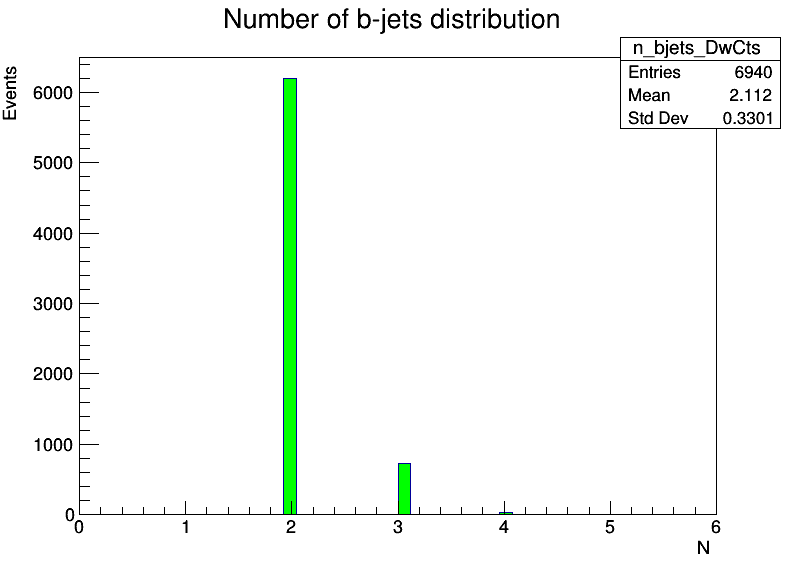

In [20]:
hist_n_bjets_DwCts.SetFillColor(3)
hist_n_bjets_DwCts.Draw()
canvas.Draw()

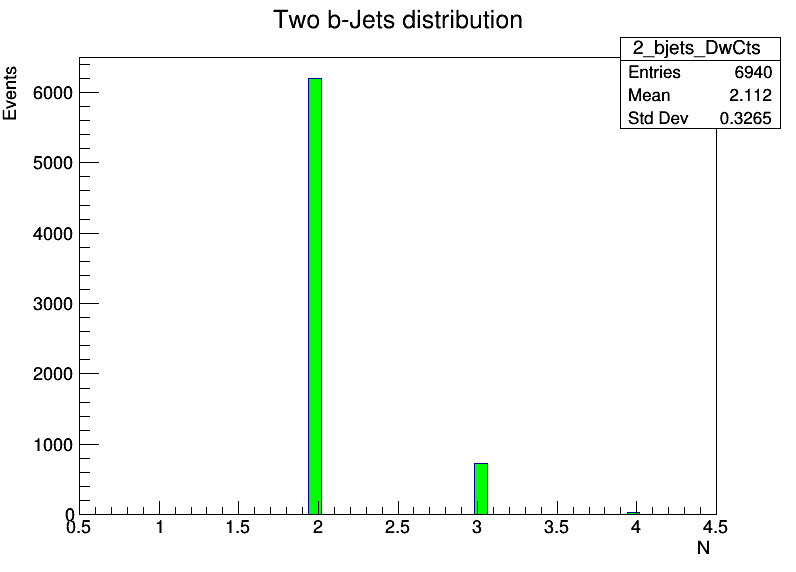

In [21]:
hist_2_bjets_DwCts.SetFillColor(3)
hist_2_bjets_DwCts.Draw()
canvas.Draw()

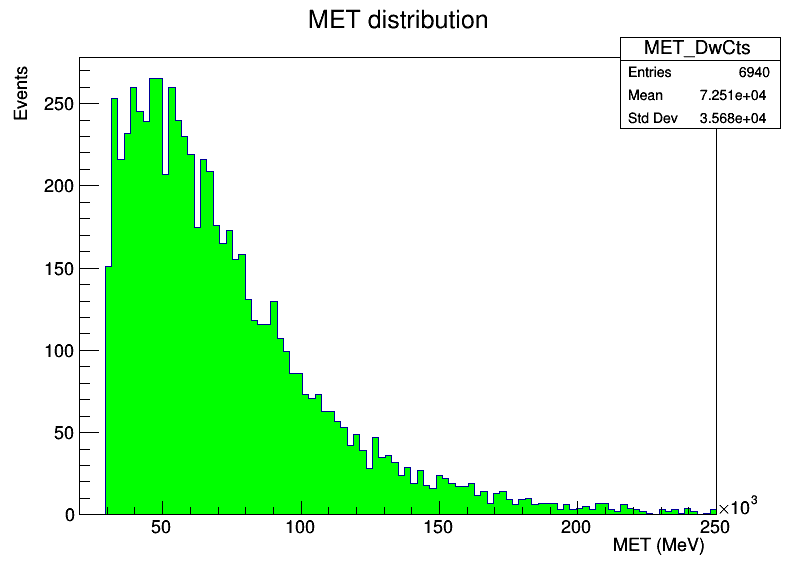

In [22]:
hist_MET_DwCts.SetFillColor(3)
hist_MET_DwCts.Draw()
canvas.Draw()

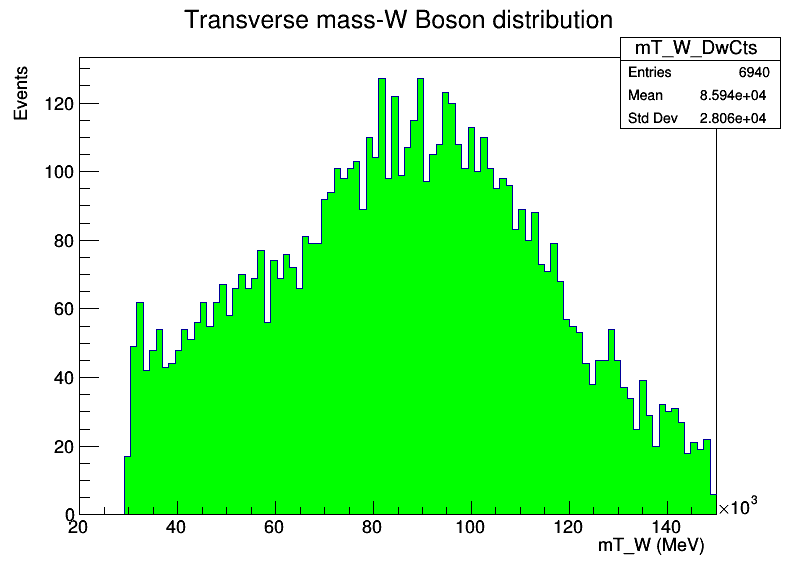

In [23]:
hist_mT_W_DwCts.SetFillColor(3)
hist_mT_W_DwCts.Draw()
canvas.Draw()

In [24]:
####MONTE CARLO ANALISYS#####
LData = 1000.
#LData = 0.001
xsec = 137.29749
#NMC_evt = 761200.21
NMC_evt = 49761200.21
fltr = 0.072212854

In [25]:
hist_njets_wghtMCwCts = ROOT.TH1F("Number of jets_wghtMCwCts","n-jets; Jet multiplicity; Events",10,3.5,8.5)
#############
hist_lep_n_wghtMCwCts = ROOT.TH1F("Lepton_n_wghtMCwCts","Number of Leptons distribution; N ; Events ",500,0,250)
hist_lep_pt_wghtMCwCts = ROOT.TH1F("Lepton_pT_wghtMCwCts","Lepton pT distribution; pT (MeV) ; Events ",100,20000,70000)
hist_lep_eta_wghtMCwCts = ROOT.TH1F("Lepton_eta_wghtMCwCts","Lepton \eta distribution; \eta (Grad) ; Events ",28,-3,3)
#############
hist_lep_TrckIslton_wghtMCwCts = ROOT.TH1F("Lepton_TrckIslton_wghtMCwCts","Lepton Track Isolation distribution; lep_ptcone30/lep_pt ; Events ",50,-0.25,0.5)
hist_lep_ClrmtrIslton_wghtMCwCts = ROOT.TH1F("Lepton_ClrmtrIslton_wghtMCwCts","Lepton Calorimeter Isolation distribution; lep_etcone20/lep_pt ; Events ",50,-0.2,0.8)
############
############
hist_n_jet_wghtMCwCts = ROOT.TH1F("n_jet_wghtMCwCts","Number of Jets distribution; N ; Events ",50,4,15)
hist_jet_pt_wghtMCwCts = ROOT.TH1F("jet_pT_wghtMCwCts","Jet pT distribution; pT (MeV) ; Events ",100,10000,150000)
hist_jet_eta_wghtMCwCts = ROOT.TH1F("jet_eta_wghtMCwCts","Jet {\eta}  distribution; \eta ; Events ",12,-3,3)
hist_jet_jvf_wghtMCwCts = ROOT.TH1F("jet_jvf_wghtMCwCts","Jet JVF distribution; JVF ; Events ",50,-0.1,1.1)
hist_jet_MV1_wghtMCwCts = ROOT.TH1F("jet_MV1_wghtMCwCts","Jet MV1 distribution; MV1 ; Events ",50,0,1)
hist_n_bjets_wghtMCwCts = ROOT.TH1F("n_bjets_wghtMCwCts","Number of b-jets distribution; N ; Events ",50,0,6)
hist_MET_wghtMCwCts = ROOT.TH1F("MET_wghtMCwCts","MET distribution; MET (MeV) ; MET (MeV) ",100,20000,250000)
hist_mT_W_wghtMCwCts = ROOT.TH1F("mT_W_wghtMCwCts","Transverse mass W-Boson distribution; mT_W (MeV) ; Events ",100,0,150000)

In [26]:
cutflow_MCwCts = ROOT.TH1F("Cutflow_MCwCts","Cutflow; Cut; Events",10,3.5,8.5)

In [27]:
cut1 = 0
cut2 = 0
cut3 = 0
cut4 = 0
cut5 = 0
cut6 = 0
cut7 = 0
cut8 = 0


for event in tree_MC:
    
    scale_Factor = tree_MC.scaleFactor_PILEUP*tree_MC.scaleFactor_ELE*tree_MC.scaleFactor_MUON*tree_MC.scaleFactor_BTAG*tree_MC.scaleFactor_TRIGGER*tree_MC.scaleFactor_JVFSF*tree_MC.scaleFactor_ZVERTEX
    evtw = tree_MC.mcWeight*scale_Factor
    
    #First cut: Good Vertex
    if (tree_MC.hasGoodVertex):
        cut1 +=1
        cutflow_MCwCts.Fill(1,evtw)
        #Second cut: Trigger
        if (tree_MC.trigE or tree_MC.trigM):
            cut2 +=1
            cutflow_MCwCts.Fill(2,evtw)
            #Preselection of good leptons
            n_mu = 0
            n_el = 0
            n_lep = 0
            #Loop over leptons
            for tr in range(tree_MC.lep_n):
                if tree_MC.lep_pt[tr]>25000.:
                    if (tree_MC.lep_ptcone30[tr]/tree_MC.lep_pt[tr])<0.15:
                        if (tree_MC.lep_etcone20[tr]/tree_MC.lep_pt[tr])<0.15:
                            if (tree_MC.lep_type[tr]==13 and ROOT.fabs(tree_MC.lep_eta[tr])<2.5):
                                n_mu +=1
                                n_lep += 1
                            elif (tree_MC.lep_type[tr]==11 and (ROOT.fabs(tree_MC.lep_eta[tr])<1.37)):
                                n_el +=1
                                n_lep += 1
                            elif (tree_MC.lep_type[tr]==11 and ((ROOT.fabs(tree_MC.lep_eta[tr])>1.52) and (ROOT.fabs(tree_MC.lep_eta[tr])<2.47))):
                                n_el +=1
                                n_lep += 1
                                #n_lep = n_mu + n_el
                            if (n_lep==1):
                                goodLptnIndx = tr
                                #Lepton.SetPtEtaPhiM(tree.lep_pt[tr],tree.lep_eta[tr],tree.lep_phi[tr],tree.lep_E[tr])
            #Select events with only 1 good lepton and fill the cutflow hidtogram
            #Third cut (one good lepton):
            if(n_lep==1):
                cutflow_MCwCts.Fill(3,evtw)
                cut3 +=1
                n_jets = 0
                n_bjets = 0
                #Number of jets distribution
                #hist_njets_MCwCts.Fill(tree_MC.jet_n)
                hist_njets_wghtMCwCts.Fill(tree_MC.jet_n,evtw)
                #Fourth cut: At least 4 jets
                if(tree_MC.jet_n >= 4):
                    cutflow_MCwCts.Fill(4,evtw)
                    cut4 +=1
                    for tr in range(tree_MC.jet_n):
                        if (tree_MC.jet_pt[tr] > 25000.) and (ROOT.fabs(tree_MC.jet_eta[tr]) < 2.5):
                            n_jets +=1
                        if (tree_MC.jet_pt[tr]<50000) and (ROOT.fabs(tree_MC.jet_eta[tr])<2.4):
                            if(tree_MC.jet_jvf[tr]>0.5):
                                n_jets +=1
                        if((tree_MC.jet_MV1[tr]) >= 0.7892):
                            n_bjets +=1
                #Fifth cut: At least 4 good jets
                if (n_jets > 4):
                    cutflow_MCwCts.Fill(5,evtw)
                    cut5 +=1
                    #Sixth cut: at least one b-jet
                    if (n_bjets >= 2):
                        cutflow_MCwCts.Fill(6,evtw)
                        cut6 +=1
                            
                        Lepton = ROOT.TLorentzVector()
                        MeT = ROOT.TLorentzVector()
                        Lepton.SetPtEtaPhiM(tree_MC.lep_pt[goodLptnIndx],tree_MC.lep_eta[goodLptnIndx],tree_MC.lep_phi[goodLptnIndx],tree_MC.lep_E[goodLptnIndx])
                        MeT.SetPtEtaPhiM(tree_MC.met_et,0.0,tree_MC.met_phi,tree_MC.met_et)
                        mTW_MC = ROOT.sqrt(2*Lepton.Pt()*MeT.Et()*(1-ROOT.cos(Lepton.DeltaPhi(MeT))))
                        #Seventh cut: MET > 30 GeV
                        if (tree_MC.met_et > 30000.):
                            cutflow_MCwCts.Fill(7,evtw)
                            cut7 +=1
                            #Eighth cut: Calculation of the mTW using TLorentz vectors
                            if (mTW_MC > 30000.):
                                cutflow_MCwCts.Fill(8,evtw)
                                cut8 +=1
                                #Filling pT Histogram
                                for tr in range(tree_MC.lep_n):
                                    #hist_lep_pt_MCwCts.Fill(tree_MC.lep_pt[tr])
                                    hist_lep_pt_wghtMCwCts.Fill(tree_MC.lep_pt[tr],evtw)
                                #Filling Track isolation Histogram
                                #for event in tree_MC:
                                for tr in range(tree_MC.lep_n):
                                    #hist_lep_TrckIslton_MCwCts.Fill(tree_MC.lep_ptcone30[tr]/tree_MC.lep_pt[tr])
                                    hist_lep_TrckIslton_wghtMCwCts.Fill(tree_MC.lep_ptcone30[tr]/tree_MC.lep_pt[tr],evtw)
                                #Filling Calorimeter solation Histogram
                                #for event in tree_MC:
                                for tr in range(tree_MC.lep_n):
                                    #hist_lep_ClrmtrIslton_MCwCts.Fill(tree_MC.lep_etcone20[tr]/tree_MC.lep_pt[tr])
                                    hist_lep_ClrmtrIslton_wghtMCwCts.Fill(tree_MC.lep_etcone20[tr]/tree_MC.lep_pt[tr],evtw)
                                #Filling eta Histogram
                                #for event in tree_MC:
                                for tr in range(tree_MC.lep_n):
                                    #hist_lep_eta_MCwCts.Fill(tree_MC.lep_eta[tr])
                                    hist_lep_eta_wghtMCwCts.Fill(tree_MC.lep_eta[tr],evtw)
                                #Filling Number of Jets Histogram
                                #for event in tree_MC:
                                #hist_n_jet_MCwCts.Fill(n_jets)
                                hist_n_jet_wghtMCwCts.Fill(n_jets,evtw)
                                #hist_2_jet_MCwCts = hist_n_jet_MCwCts
                                #Filling jet_pT Histogram
                                #for event in tree_MC:
                                for tr in range(tree_MC.jet_n):
                                    #hist_jet_pt_MCwCts.Fill(tree_MC.jet_pt[tr])
                                    hist_jet_pt_wghtMCwCts.Fill(tree_MC.jet_pt[tr],evtw)
                                #Filling jet_eta Histogram
                                #for event in tree_MC:
                                for tr in range(tree_MC.jet_n):
                                    #hist_jet_eta_MCwCts.Fill(tree_MC.jet_eta[tr])
                                    hist_jet_eta_wghtMCwCts.Fill(tree_MC.jet_eta[tr],evtw)
                                #Filling jet_JVF Histogram
                                #for event in tree_MC:
                                for tr in range(tree_MC.jet_n):
                                    #hist_jet_jvf_MCwCts.Fill(tree_MC.jet_jvf[tr])
                                    hist_jet_jvf_wghtMCwCts.Fill(tree_MC.jet_jvf[tr],evtw)
                                #Filling jet_MV1 Histogram
                                #for event in tree_MC:
                                for tr in range(tree_MC.jet_n):
                                    #hist_jet_MV1_MCwCts.Fill(tree_MC.jet_MV1[tr])
                                    hist_jet_MV1_wghtMCwCts.Fill(tree_MC.jet_MV1[tr],evtw)
                                #Filling Number of b-Jets Histogram
                                #for event in tree_MC:
                                #hist_n_bjets_MCwCts.Fill(n_bjets)
                                hist_n_bjets_wghtMCwCts.Fill(n_bjets,evtw)
                                #hist_2_bjets_MCwCts.Fill(n_bjets)
                                #Filling MET Histogram
                                #for event in tree_Data:
                                #hist_MET_MCwCts.Fill(tree_MC.met_et)
                                hist_MET_wghtMCwCts.Fill(tree_MC.met_et,evtw)
                                #Filling mT_W Histogram
                                #for event in tree_Data:
                                
                                #hist_mT_W_MCwCts.Fill(mTW_MC)
                                hist_mT_W_wghtMCwCts.Fill(mTW_MC,evtw)
                                



            

print(cut1)
print(cut2)
print(cut3)
print(cut4)
print(cut5)
print(cut6)
print(cut7)
print(cut8)

1499487
1499487
1336213
623272
583648
242321
199866
174226


In [28]:
#evtw = evtw_SF*((LData*xsec)/(NMC_evt*fltr))
Scl_Crrctn = ((LData*xsec)/(NMC_evt*fltr))
hist_njets_wghtMCwCts = Scl_Crrctn*hist_njets_wghtMCwCts
hist_lep_pt_wghtMCwCts = Scl_Crrctn*hist_lep_pt_wghtMCwCts
hist_njets_wghtMCwCts = Scl_Crrctn*hist_njets_wghtMCwCts
hist_mT_W_wghtMCwCts = Scl_Crrctn*hist_mT_W_wghtMCwCts
hist_lep_eta_wghtMCwCts = Scl_Crrctn*hist_lep_eta_wghtMCwCts
hist_lep_TrckIslton_wghtMCwCts = Scl_Crrctn*hist_lep_TrckIslton_wghtMCwCts
hist_lep_ClrmtrIslton_wghtMCwCts = Scl_Crrctn*hist_lep_ClrmtrIslton_wghtMCwCts
hist_jet_pt_wghtMCwCts = Scl_Crrctn*hist_jet_pt_wghtMCwCts
hist_jet_eta_wghtMCwCts = Scl_Crrctn*hist_jet_eta_wghtMCwCts
hist_jet_jvf_wghtMCwCts = Scl_Crrctn*hist_jet_jvf_wghtMCwCts
hist_jet_MV1_wghtMCwCts = Scl_Crrctn*hist_jet_MV1_wghtMCwCts
hist_n_bjets_wghtMCwCts = Scl_Crrctn*hist_n_bjets_wghtMCwCts
hist_MET_wghtMCwCts = Scl_Crrctn*hist_MET_wghtMCwCts
hist_n_jet_wghtMCwCts = Scl_Crrctn*hist_n_jet_wghtMCwCts

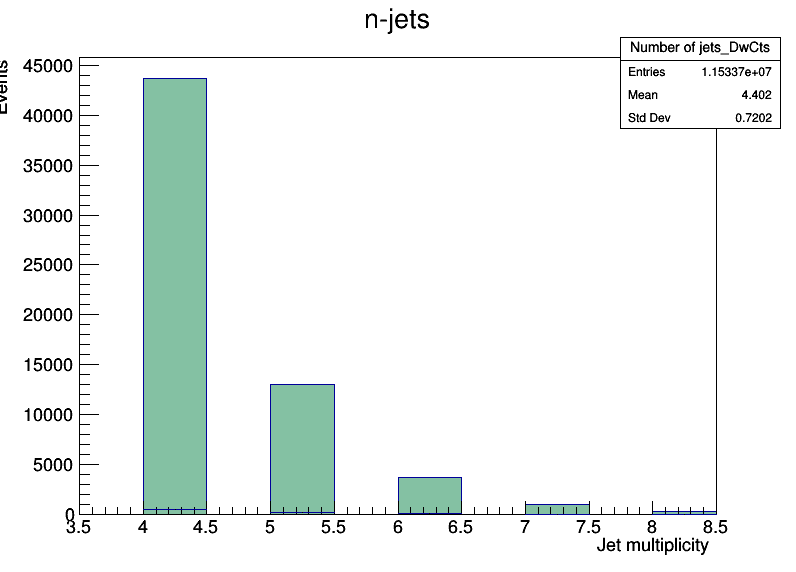

In [29]:
hist_njets_DwCts.SetFillColor(30)
hist_njets_DwCts.Draw("")
hist_njets_wghtMCwCts.SetFillColor(46)
hist_njets_wghtMCwCts.Draw("same")
canvas.Draw()

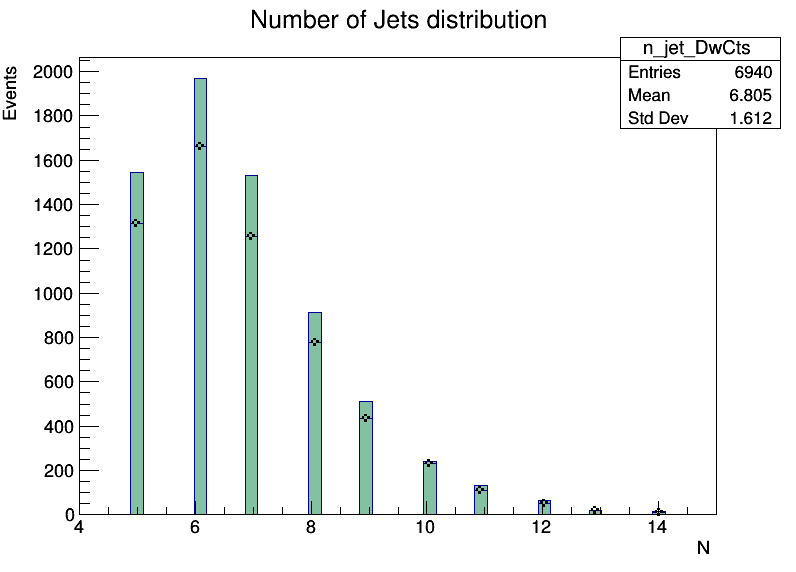

In [30]:
hist_n_jet_DwCts.SetFillColor(30)
#hist_njets_DwCts.SetMarkerStyle(48)
#hist_njets_DwCts.SetMarkerColor(2)
hist_n_jet_DwCts.Draw("")
#hist_n_jet_wghtMCwCts.SetFillColor(46)
hist_n_jet_wghtMCwCts.SetMarkerStyle(49)
hist_n_jet_wghtMCwCts.Draw("same")
canvas.Draw()

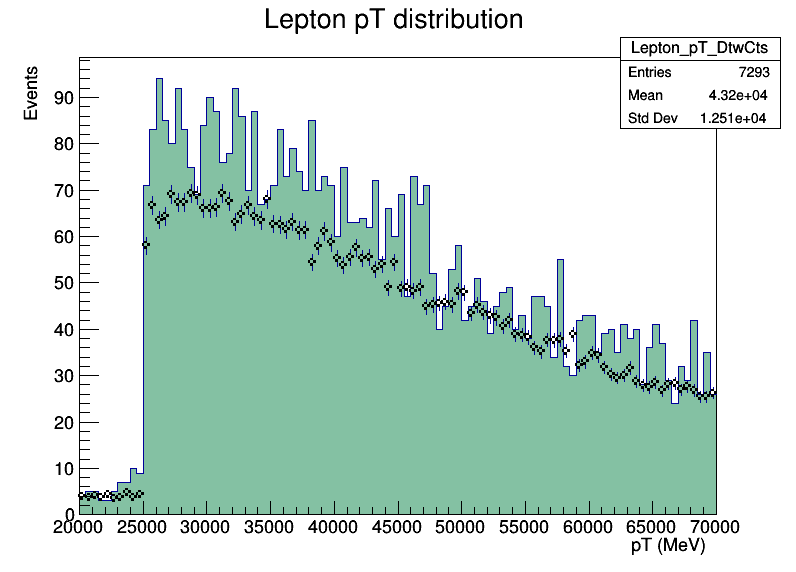

In [31]:
hist_lep_pt_DwCts.SetFillColor(30)
hist_lep_pt_DwCts.Draw("")
hist_lep_pt_wghtMCwCts.SetMarkerStyle(49)
#hist_lep_pt_wghtMCwCts.SetFillColor(46)
hist_lep_pt_wghtMCwCts.Draw("same")
canvas.Draw() 

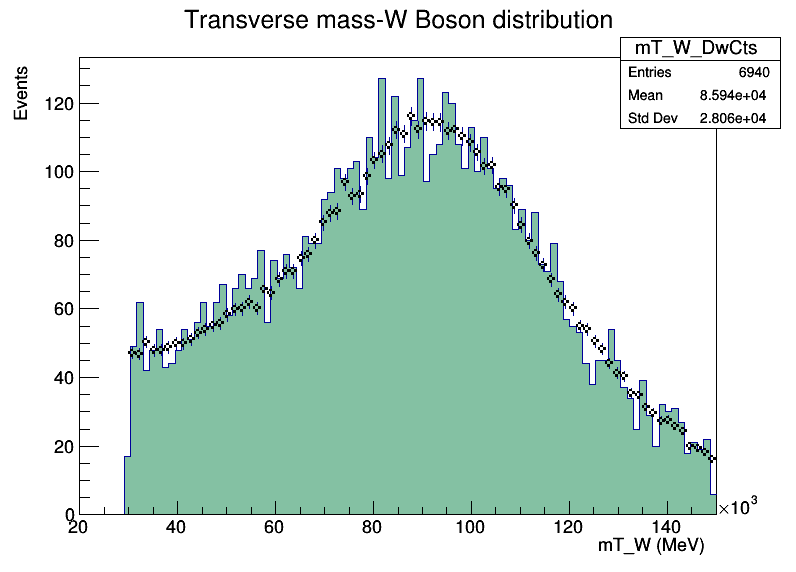

In [32]:
hist_mT_W_DwCts.SetFillColor(30)
hist_mT_W_DwCts.Draw("")
hist_mT_W_wghtMCwCts.SetMarkerStyle(49)
hist_mT_W_wghtMCwCts.Draw("same")
canvas.Draw() 

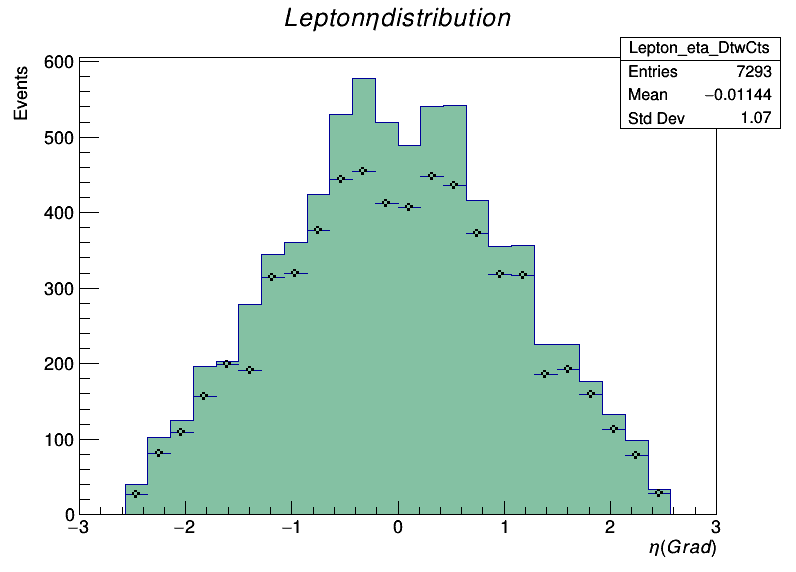

In [33]:
hist_lep_eta_DwCts.SetFillColor(30)
hist_lep_eta_DwCts.Draw("")
hist_lep_eta_wghtMCwCts.SetMarkerStyle(49)
hist_lep_eta_wghtMCwCts.Draw("same")
canvas.Draw()

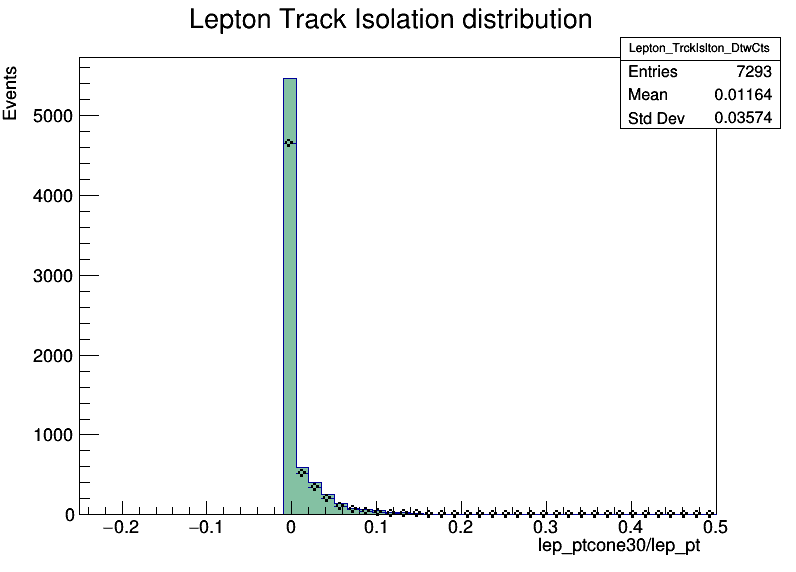

In [34]:
hist_lep_TrckIslton_DwCts.SetFillColor(30)
hist_lep_TrckIslton_DwCts.Draw("")
hist_lep_TrckIslton_wghtMCwCts.SetMarkerStyle(49)
hist_lep_TrckIslton_wghtMCwCts.Draw("same")
canvas.Draw()

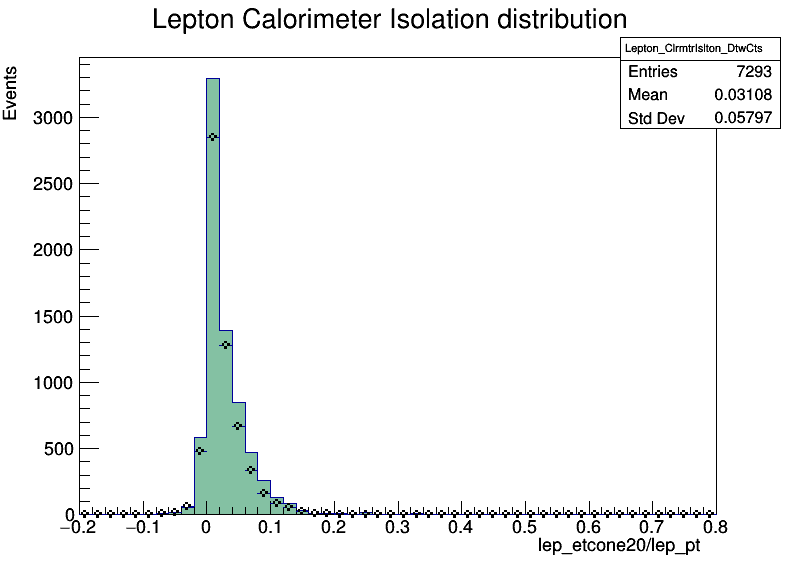

In [35]:
hist_lep_ClrmtrIslton_DwCts.SetFillColor(30)
hist_lep_ClrmtrIslton_DwCts.Draw("")
hist_lep_ClrmtrIslton_wghtMCwCts.SetMarkerStyle(49)
hist_lep_ClrmtrIslton_wghtMCwCts.Draw("same")
canvas.Draw()

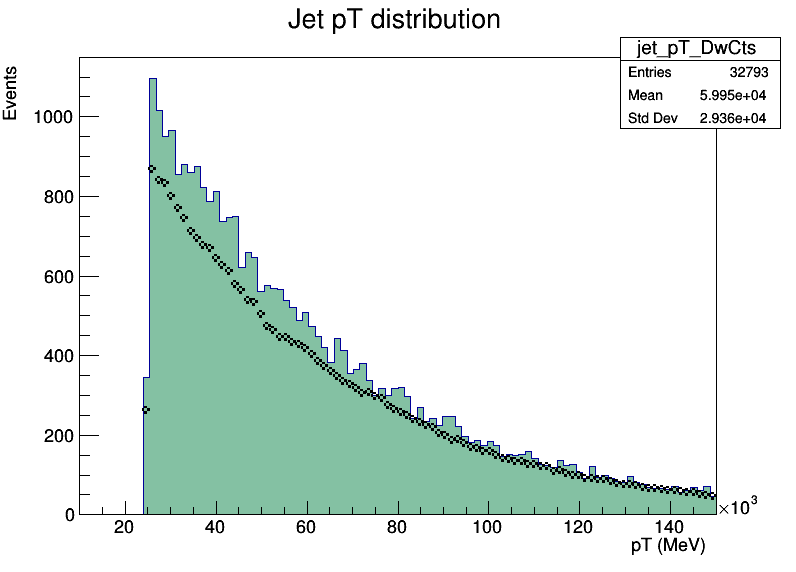

In [36]:
hist_jet_pt_DwCts.SetFillColor(30)
hist_jet_pt_DwCts.Draw("")
hist_jet_pt_wghtMCwCts.SetMarkerStyle(49)
hist_jet_pt_wghtMCwCts.Draw("same")
canvas.Draw()

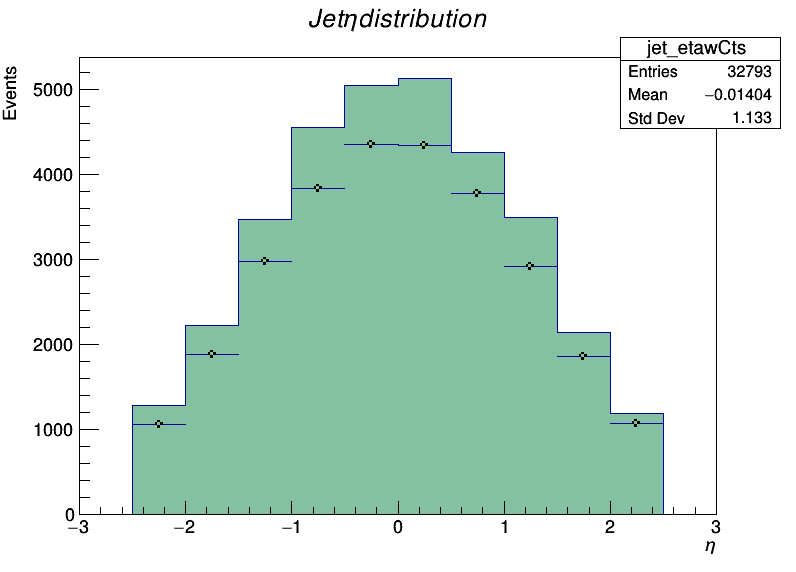

In [37]:
hist_jet_eta_DwCts.SetFillColor(30)
hist_jet_eta_DwCts.Draw("")
hist_jet_eta_wghtMCwCts.SetMarkerStyle(49)
hist_jet_eta_wghtMCwCts.Draw("same")
canvas.Draw()

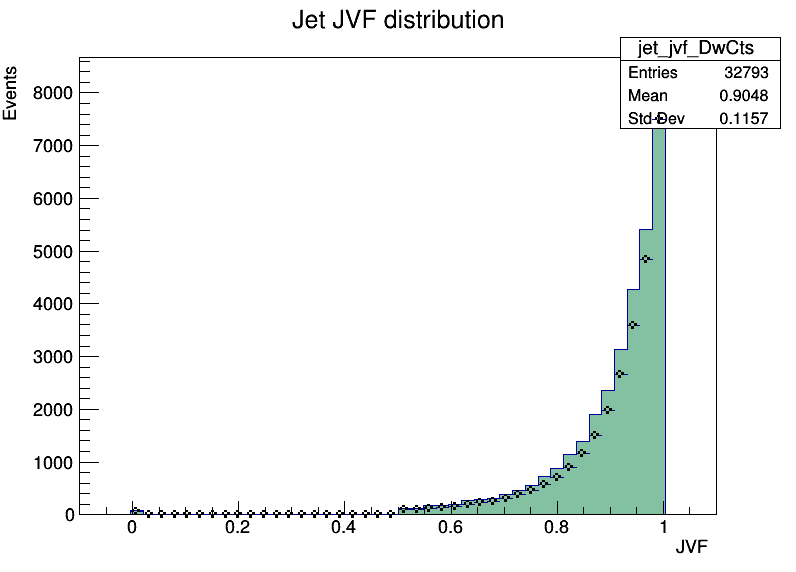

In [38]:
hist_jet_jvf_DwCts.SetFillColor(30)
hist_jet_jvf_DwCts.Draw("")
hist_jet_jvf_wghtMCwCts.SetMarkerStyle(49)
hist_jet_jvf_wghtMCwCts.Draw("same")
canvas.Draw()

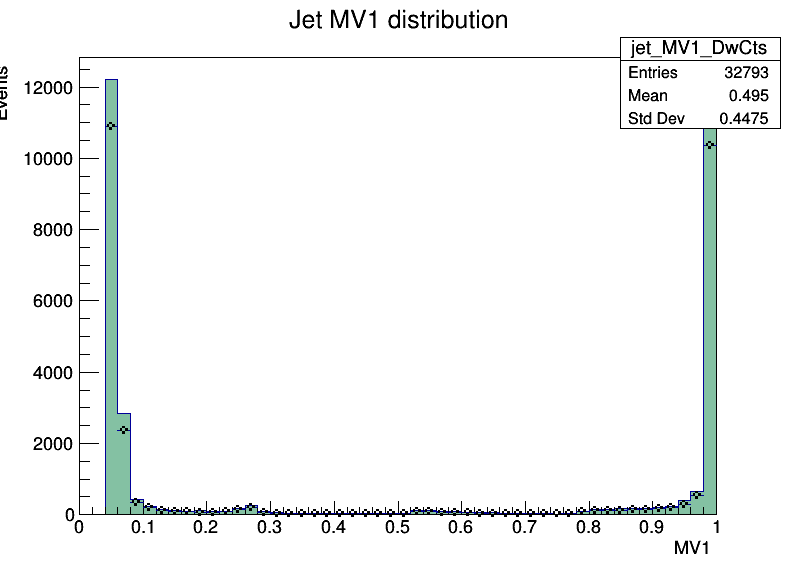

In [39]:
hist_jet_MV1_DwCts.SetFillColor(30)
hist_jet_MV1_DwCts.Draw("")
hist_jet_MV1_wghtMCwCts.SetMarkerStyle(49)
hist_jet_MV1_wghtMCwCts.Draw("same")
canvas.Draw()

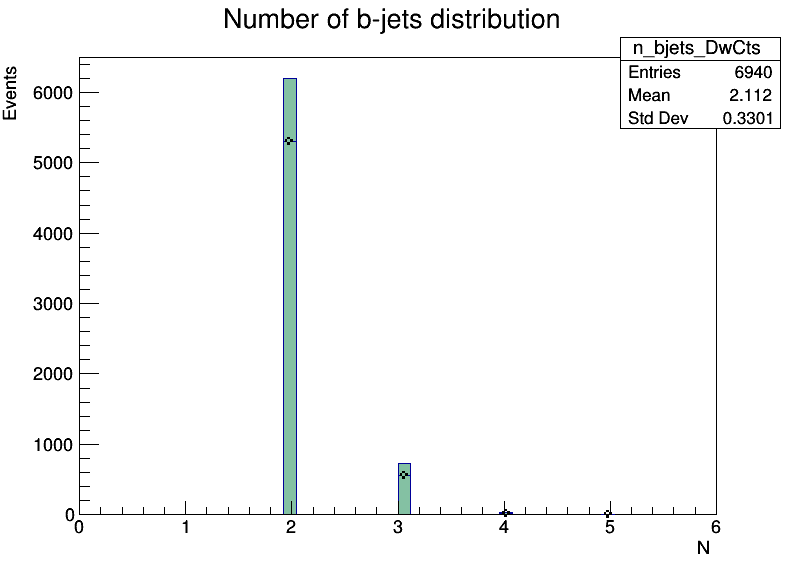

In [40]:
hist_n_bjets_DwCts.SetFillColor(30)
hist_n_bjets_DwCts.Draw("")
hist_n_bjets_wghtMCwCts.SetMarkerStyle(49)
hist_n_bjets_wghtMCwCts.Draw("same")
canvas.Draw()

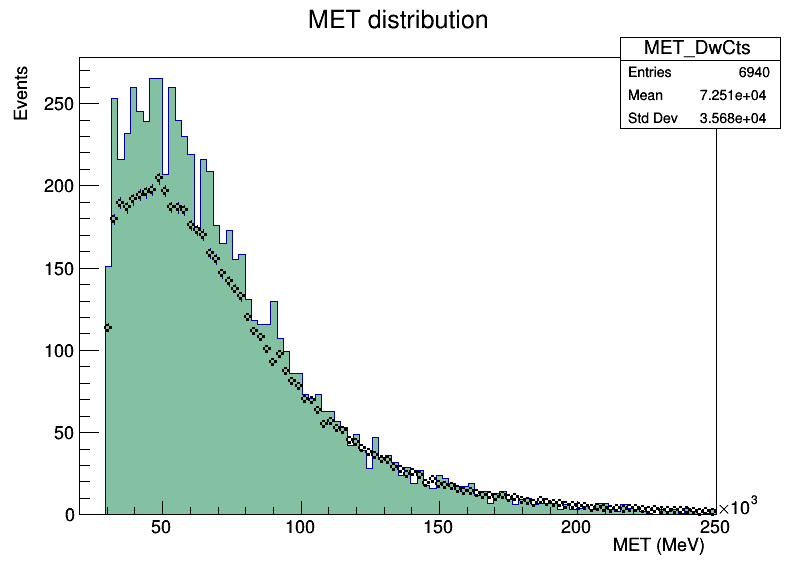

In [41]:
hist_MET_DwCts.SetFillColor(30)
hist_MET_DwCts.Draw("")
hist_MET_wghtMCwCts.SetMarkerStyle(49)
hist_MET_wghtMCwCts.Draw("same")
canvas.Draw()